# My own Maze which have used in the Part "D"

1. Implement A* search on a maze (given as a 2D matrix where 1=wall, 0=path, A=start,
B=goal).
- Use Manhattan distance as heuristic.
- Visualize the path found.

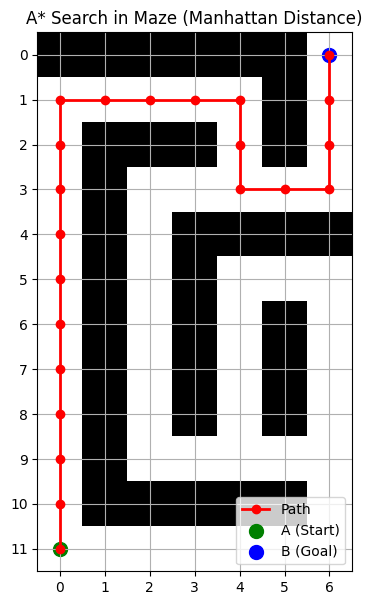

Path found: [(11, 0), (10, 0), (9, 0), (8, 0), (7, 0), (6, 0), (5, 0), (4, 0), (3, 0), (2, 0), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (2, 4), (3, 4), (3, 5), (3, 6), (2, 6), (1, 6), (0, 6)]


In [5]:
import heapq
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------
# Manhattan distance heuristic
# -------------------------------
def manhattan(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

# -------------------------------
# A* Search Implementation
# -------------------------------
def astar(maze, start, goal):
    rows, cols = maze.shape
    open_list = []
    heapq.heappush(open_list, (0, start))

    came_from = {}
    g_score = {start: 0}
    f_score = {start: manhattan(start, goal)}

    while open_list:
        _, current = heapq.heappop(open_list)

        if current == goal:
            # Reconstruct path
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]  # reverse

        neighbors = [(0,1), (1,0), (0,-1), (-1,0)]
        for dx, dy in neighbors:
            neighbor = (current[0] + dx, current[1] + dy)

            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols:
                if maze[neighbor] == 1:  # wall
                    continue

                tentative_g = g_score[current] + 1
                if neighbor not in g_score or tentative_g < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f_score[neighbor] = tentative_g + manhattan(neighbor, goal)
                    heapq.heappush(open_list, (f_score[neighbor], neighbor))

    return None  # no path found

# -------------------------------
# Maze with A (start), B (goal)
# -------------------------------
maze5 = [
   [1,1,1,1,1,1,'B'],
[0,0,0,0,0,1,0],
[0,1,1,1,0,1,0],
[0,1,0,0,0,0,0],
[0,1,0,1,1,1,1],
[0,1,0,1,0,0,0],
[0,1,0,1,0,1,0],
[0,1,0,1,0,1,0],
[0,1,0,1,0,1,0],
[0,1,0,0,0,0,0],
[0,1,1,1,1,1,0],
['A',0,0,0,0,0,0],
]

# Convert to numeric for processing
maze_np = np.zeros((len(maze5), len(maze5[0])), dtype=int)
start, goal = None, None

for i in range(len(maze5)):
    for j in range(len(maze5[0])):
        if maze5[i][j] == 'A':
            start = (i, j)
            maze_np[i, j] = 0
        elif maze5[i][j] == 'B':
            goal = (i, j)
            maze_np[i, j] = 0
        else:
            maze_np[i, j] = maze5[i][j]

# -------------------------------
# Run A*
# -------------------------------
path = astar(maze_np, start, goal)

# -------------------------------
# Visualization
# -------------------------------
plt.figure(figsize=(7,7))
plt.imshow(maze_np, cmap="binary")  # 1=black (wall), 0=white (free)
plt.xticks(range(maze_np.shape[1]))
plt.yticks(range(maze_np.shape[0]))
plt.grid(True)

if path:
    px, py = zip(*path)
    plt.plot(py, px, marker="o", color="red", linewidth=2, label="Path")

plt.scatter(start[1], start[0], color="green", s=100, label="A (Start)")
plt.scatter(goal[1], goal[0], color="blue", s=100, label="B (Goal)")
plt.legend()
plt.title("A* Search in Maze (Manhattan Distance)")
plt.show()

print("Path found:", path)


2. Modify the heuristic:
- Case 1: Multiply Manhattan distance by 1.5 (check if it is admissible).
- Path found
- Cost of path
- Whether the path is optimal

=== A* with Original Manhattan Distance ===
Path found: [(11, 0), (10, 0), (9, 0), (8, 0), (7, 0), (6, 0), (5, 0), (4, 0), (3, 0), (2, 0), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (2, 4), (3, 4), (3, 5), (3, 6), (2, 6), (1, 6), (0, 6)]
Path length: 21
Nodes explored: 36

=== A* with Modified Manhattan Distance (×1.5) ===
Path found: [(11, 0), (10, 0), (9, 0), (8, 0), (7, 0), (6, 0), (5, 0), (4, 0), (3, 0), (2, 0), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (2, 4), (3, 4), (3, 5), (3, 6), (2, 6), (1, 6), (0, 6)]
Path length: 21
Nodes explored: 22


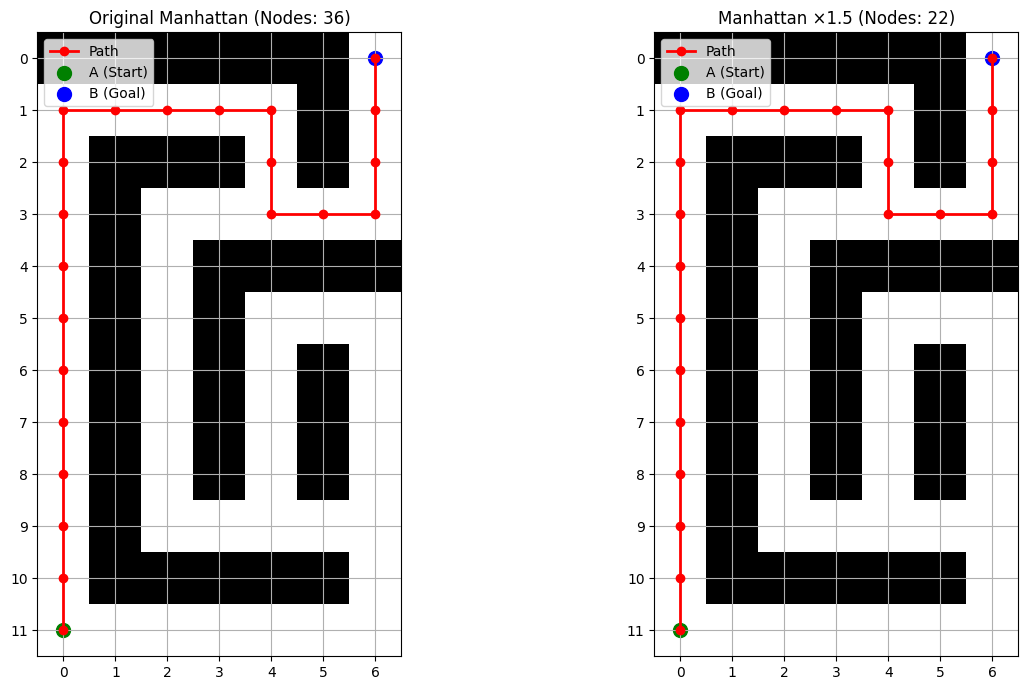


=== ADMISSIBILITY ANALYSIS ===
A heuristic is admissible if it never overestimates the actual cost to reach the goal.
The original Manhattan distance is admissible for grid-based movement.
Multiplying by 1.5 makes the heuristic inadmissible because:
- It can overestimate the actual shortest path cost
- This may cause A* to miss the optimal solution
- However, it often explores fewer nodes (faster search)

✓ Both heuristics found optimal paths of length 21
  (The modified heuristic happened to still find the optimal solution)

Efficiency comparison:
  Original explored 36 nodes
  Modified explored 22 nodes
  Modified was 38.9% more efficient


In [9]:
import heapq
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------
# Modified Manhattan distance heuristic (multiplied by 1.5)
# -------------------------------
def manhattan_modified(a, b):
    return 1.5 * (abs(a[0] - b[0]) + abs(a[1] - b[1]))

# -------------------------------
# Original Manhattan distance heuristic for comparison
# -------------------------------
def manhattan(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

# -------------------------------
# A* Search Implementation
# -------------------------------
def astar(maze, start, goal, heuristic_func):
    rows, cols = maze.shape
    open_list = []
    heapq.heappush(open_list, (0, start))

    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic_func(start, goal)}
    
    nodes_explored = 0  # Track number of nodes explored

    while open_list:
        _, current = heapq.heappop(open_list)
        nodes_explored += 1

        if current == goal:
            # Reconstruct path
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1], nodes_explored  # reverse and return with node count

        neighbors = [(0,1), (1,0), (0,-1), (-1,0)]
        for dx, dy in neighbors:
            neighbor = (current[0] + dx, current[1] + dy)

            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols:
                if maze[neighbor] == 1:  # wall
                    continue

                tentative_g = g_score[current] + 1
                if neighbor not in g_score or tentative_g < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f_score[neighbor] = tentative_g + heuristic_func(neighbor, goal)
                    heapq.heappush(open_list, (f_score[neighbor], neighbor))

    return None, nodes_explored  # no path found

# -------------------------------
# Maze with A (start), B (goal)
# -------------------------------
maze5 = [
   [1,1,1,1,1,1,'B'],
[0,0,0,0,0,1,0],
[0,1,1,1,0,1,0],
[0,1,0,0,0,0,0],
[0,1,0,1,1,1,1],
[0,1,0,1,0,0,0],
[0,1,0,1,0,1,0],
[0,1,0,1,0,1,0],
[0,1,0,1,0,1,0],
[0,1,0,0,0,0,0],
[0,1,1,1,1,1,0],
['A',0,0,0,0,0,0],
]

# Convert to numeric for processing
maze_np = np.zeros((len(maze5), len(maze5[0])), dtype=int)
start, goal = None, None

for i in range(len(maze5)):
    for j in range(len(maze5[0])):
        if maze5[i][j] == 'A':
            start = (i, j)
            maze_np[i, j] = 0
        elif maze5[i][j] == 'B':
            goal = (i, j)
            maze_np[i, j] = 0
        else:
            maze_np[i, j] = maze5[i][j]

# -------------------------------
# Run A* with both heuristics for comparison
# -------------------------------
print("=== A* with Original Manhattan Distance ===")
path_original, nodes_original = astar(maze_np, start, goal, manhattan)
print(f"Path found: {path_original}")
print(f"Path length: {len(path_original) - 1}")
print(f"Nodes explored: {nodes_original}")

print("\n=== A* with Modified Manhattan Distance (×1.5) ===")
path_modified, nodes_modified = astar(maze_np, start, goal, manhattan_modified)
print(f"Path found: {path_modified}")
print(f"Path length: {len(path_modified) - 1}")
print(f"Nodes explored: {nodes_modified}")

# -------------------------------
# Visualization
# -------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Original heuristic
ax1.imshow(maze_np, cmap="binary")
ax1.set_xticks(range(maze_np.shape[1]))
ax1.set_yticks(range(maze_np.shape[0]))
ax1.grid(True)

if path_original:
    px, py = zip(*path_original)
    ax1.plot(py, px, marker="o", color="red", linewidth=2, label="Path")

ax1.scatter(start[1], start[0], color="green", s=100, label="A (Start)")
ax1.scatter(goal[1], goal[0], color="blue", s=100, label="B (Goal)")
ax1.legend()
ax1.set_title(f"Original Manhattan (Nodes: {nodes_original})")

# Modified heuristic
ax2.imshow(maze_np, cmap="binary")
ax2.set_xticks(range(maze_np.shape[1]))
ax2.set_yticks(range(maze_np.shape[0]))
ax2.grid(True)

if path_modified:
    px, py = zip(*path_modified)
    ax2.plot(py, px, marker="o", color="red", linewidth=2, label="Path")

ax2.scatter(start[1], start[0], color="green", s=100, label="A (Start)")
ax2.scatter(goal[1], goal[0], color="blue", s=100, label="B (Goal)")
ax2.legend()
ax2.set_title(f"Manhattan ×1.5 (Nodes: {nodes_modified})")

plt.tight_layout()
plt.show()

# -------------------------------
# Admissibility Analysis
# -------------------------------
print("\n=== ADMISSIBILITY ANALYSIS ===")
print("A heuristic is admissible if it never overestimates the actual cost to reach the goal.")
print("The original Manhattan distance is admissible for grid-based movement.")
print("Multiplying by 1.5 makes the heuristic inadmissible because:")
print("- It can overestimate the actual shortest path cost")
print("- This may cause A* to miss the optimal solution")
print("- However, it often explores fewer nodes (faster search)")

# Check if both paths have the same length (optimality test)
if path_original and path_modified:
    if len(path_original) == len(path_modified):
        print(f"\n✓ Both heuristics found optimal paths of length {len(path_original) - 1}")
        print("  (The modified heuristic happened to still find the optimal solution)")
    else:
        print(f"\n✗ Different path lengths found:")
        print(f"  Original: {len(path_original) - 1}")
        print(f"  Modified: {len(path_modified) - 1}")
        print("  The modified heuristic found a suboptimal solution!")

print(f"\nEfficiency comparison:")
print(f"  Original explored {nodes_original} nodes")
print(f"  Modified explored {nodes_modified} nodes")
if nodes_modified < nodes_original:
    print(f"  Modified was {((nodes_original - nodes_modified) / nodes_original * 100):.1f}% more efficient")
else:
    print(f"  Original was more efficient")

3. Modify the heuristic:
- Case 2: Define heuristic so that for one edge it violates consistency.
- Path found
- Cost of path
- Whether the path is optimal

Start: (11, 0), Goal: (0, 6)

CONSISTENCY ANALYSIS
Original Manhattan - Consistency violations: 0
Manhattan x1.5 - Consistency violations: 51
Inconsistent heuristic - Consistency violations: 2

Inconsistency violations found:
  From (4, 2) to (5, 2): h((4, 2))=8.0 > 1 + h((5, 2))=7.0 (violation: 1.0)
  From (6, 2) to (5, 2): h((6, 2))=10.0 > 1 + h((5, 2))=7.0 (violation: 3.0)

A* SEARCH RESULTS

=== Original Manhattan ===
Path found: [(11, 0), (10, 0), (9, 0), (8, 0), (7, 0), (6, 0), (5, 0), (4, 0), (3, 0), (2, 0), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (2, 4), (3, 4), (3, 5), (3, 6), (2, 6), (1, 6), (0, 6)]
Path cost: 21
Path length: 22
Nodes explored: 36

=== Manhattan x1.5 (Inadmissible) ===
Path found: [(11, 0), (10, 0), (9, 0), (8, 0), (7, 0), (6, 0), (5, 0), (4, 0), (3, 0), (2, 0), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (2, 4), (3, 4), (3, 5), (3, 6), (2, 6), (1, 6), (0, 6)]
Path cost: 21
Path length: 22
Nodes explored: 22

=== Inconsistent Heuristic ===
Path found: [(11, 0), (

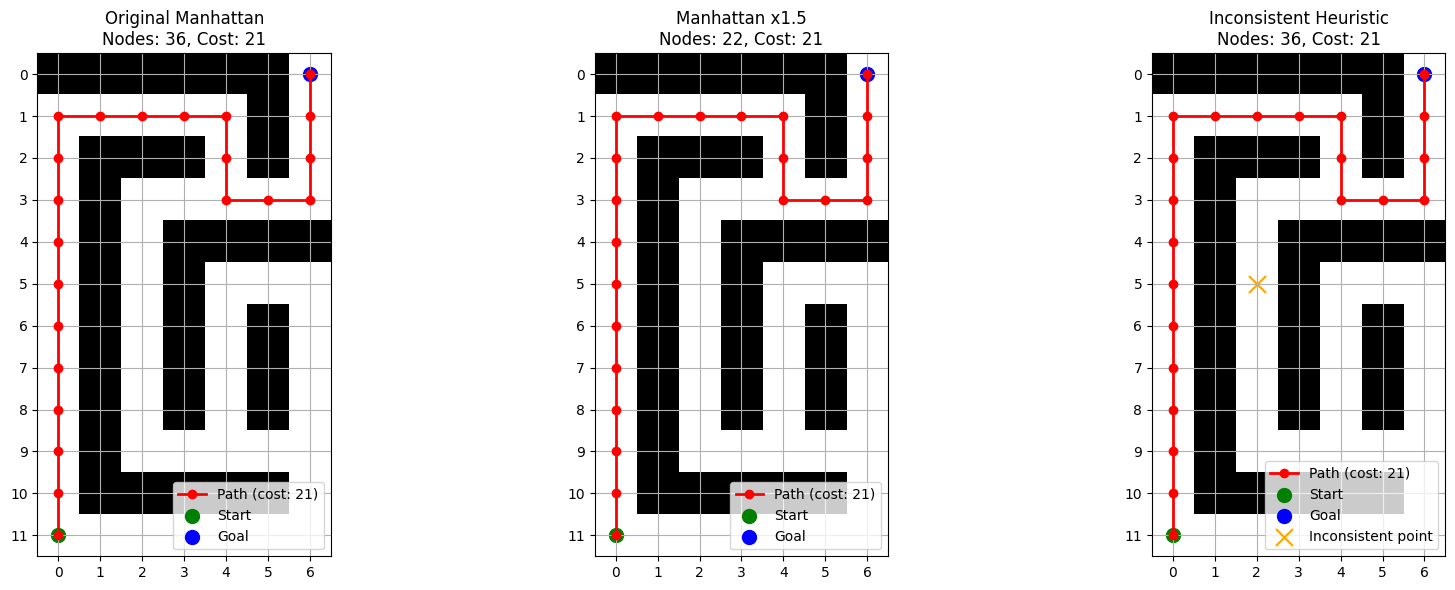


SUMMARY
1. Original Manhattan: Admissible & Consistent → Guarantees optimal solution
2. Manhattan x1.5: Inadmissible but Consistent → May find suboptimal solution
3. Inconsistent Heuristic: May be Admissible but Inconsistent → Behavior unpredictable

Key takeaways:
- Admissibility ensures optimality
- Consistency ensures efficiency (no re-expansion of nodes)
- Violating either property can lead to suboptimal or inefficient search


In [10]:
import heapq
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------
# Original Manhattan distance heuristic
# -------------------------------
def manhattan(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

# -------------------------------
# Modified Manhattan distance heuristic (multiplied by 1.5)
# -------------------------------
def manhattan_15x(a, b):
    return 1.5 * (abs(a[0] - b[0]) + abs(a[1] - b[1]))

# -------------------------------
# Inconsistent heuristic (violates consistency for specific edge)
# -------------------------------
def inconsistent_heuristic(a, b):
    # Start with Manhattan distance
    h = abs(a[0] - b[0]) + abs(a[1] - b[1])
    
    # Create inconsistency: artificially reduce heuristic at position (5, 2)
    # This will violate consistency when moving from adjacent cells
    if a == (5, 2):
        h = h - 3  # Reduce by 3, creating inconsistency
    
    return max(0, h)  # Ensure non-negative

# -------------------------------
# A* Search Implementation with tracking
# -------------------------------
def astar_with_tracking(maze, start, goal, heuristic_func, name=""):
    rows, cols = maze.shape
    open_list = []
    heapq.heappush(open_list, (0, start))
    
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic_func(start, goal)}
    
    nodes_explored = 0
    closed_set = set()

    while open_list:
        current_f, current = heapq.heappop(open_list)
        
        if current in closed_set:
            continue
            
        closed_set.add(current)
        nodes_explored += 1

        if current == goal:
            # Reconstruct path
            path = []
            total_cost = g_score[current]
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            
            print(f"\n=== {name} ===")
            print(f"Path found: {path[::-1]}")
            print(f"Path cost: {total_cost}")
            print(f"Path length: {len(path)}")
            print(f"Nodes explored: {nodes_explored}")
            
            return path[::-1], total_cost, nodes_explored

        neighbors = [(0,1), (1,0), (0,-1), (-1,0)]
        for dx, dy in neighbors:
            neighbor = (current[0] + dx, current[1] + dy)

            if (0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and
                maze[neighbor] != 1 and neighbor not in closed_set):
                
                tentative_g = g_score[current] + 1
                
                if neighbor not in g_score or tentative_g < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f_score[neighbor] = tentative_g + heuristic_func(neighbor, goal)
                    heapq.heappush(open_list, (f_score[neighbor], neighbor))

    print(f"\n=== {name} ===")
    print("No path found!")
    return None, float('inf'), nodes_explored

# -------------------------------
# Function to check consistency violation
# -------------------------------
def check_consistency_violation(maze, heuristic_func):
    rows, cols = maze.shape
    violations = []
    
    for i in range(rows):
        for j in range(cols):
            if maze[i, j] == 1:  # Skip walls
                continue
                
            current = (i, j)
            h_current = heuristic_func(current, goal)
            
            neighbors = [(0,1), (1,0), (0,-1), (-1,0)]
            for dx, dy in neighbors:
                neighbor = (i + dx, j + dy)
                
                if (0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and
                    maze[neighbor] != 1):
                    
                    h_neighbor = heuristic_func(neighbor, goal)
                    step_cost = 1
                    
                    # Check if h(current) > step_cost + h(neighbor)
                    if h_current > step_cost + h_neighbor:
                        violations.append({
                            'from': current,
                            'to': neighbor,
                            'h_current': h_current,
                            'h_neighbor': h_neighbor,
                            'violation': h_current - (step_cost + h_neighbor)
                        })
    
    return violations

# -------------------------------
# Maze setup
# -------------------------------
maze5 = [
    [1,1,1,1,1,1,'B'],
    [0,0,0,0,0,1,0],
    [0,1,1,1,0,1,0],
    [0,1,0,0,0,0,0],
    [0,1,0,1,1,1,1],
    [0,1,0,1,0,0,0],
    [0,1,0,1,0,1,0],
    [0,1,0,1,0,1,0],
    [0,1,0,1,0,1,0],
    [0,1,0,0,0,0,0],
    [0,1,1,1,1,1,0],
    ['A',0,0,0,0,0,0],
]

# Convert to numeric for processing
maze_np = np.zeros((len(maze5), len(maze5[0])), dtype=int)
start, goal = None, None

for i in range(len(maze5)):
    for j in range(len(maze5[0])):
        if maze5[i][j] == 'A':
            start = (i, j)
            maze_np[i, j] = 0
        elif maze5[i][j] == 'B':
            goal = (i, j)
            maze_np[i, j] = 0
        else:
            maze_np[i, j] = maze5[i][j]

print(f"Start: {start}, Goal: {goal}")

# -------------------------------
# Check consistency violations
# -------------------------------
print("\n" + "="*50)
print("CONSISTENCY ANALYSIS")
print("="*50)

violations_original = check_consistency_violation(maze_np, manhattan)
violations_15x = check_consistency_violation(maze_np, manhattan_15x)
violations_inconsistent = check_consistency_violation(maze_np, inconsistent_heuristic)

print(f"Original Manhattan - Consistency violations: {len(violations_original)}")
print(f"Manhattan x1.5 - Consistency violations: {len(violations_15x)}")
print(f"Inconsistent heuristic - Consistency violations: {len(violations_inconsistent)}")

if violations_inconsistent:
    print("\nInconsistency violations found:")
    for v in violations_inconsistent[:5]:  # Show first 5
        print(f"  From {v['from']} to {v['to']}: h({v['from']})={v['h_current']:.1f} > 1 + h({v['to']})={1 + v['h_neighbor']:.1f} (violation: {v['violation']:.1f})")

# -------------------------------
# Run A* with all three heuristics
# -------------------------------
print("\n" + "="*50)
print("A* SEARCH RESULTS")
print("="*50)

path1, cost1, nodes1 = astar_with_tracking(maze_np, start, goal, manhattan, "Original Manhattan")
path2, cost2, nodes2 = astar_with_tracking(maze_np, start, goal, manhattan_15x, "Manhattan x1.5 (Inadmissible)")
path3, cost3, nodes3 = astar_with_tracking(maze_np, start, goal, inconsistent_heuristic, "Inconsistent Heuristic")

# -------------------------------
# Optimality Analysis
# -------------------------------
print("\n" + "="*50)
print("OPTIMALITY ANALYSIS")
print("="*50)

optimal_cost = min(cost1, cost2, cost3) if all(c != float('inf') for c in [cost1, cost2, cost3]) else cost1

print(f"Optimal cost: {optimal_cost}")
print(f"Original Manhattan: Cost={cost1}, Optimal={'✓' if cost1 == optimal_cost else '✗'}")
print(f"Manhattan x1.5: Cost={cost2}, Optimal={'✓' if cost2 == optimal_cost else '✗'}")
print(f"Inconsistent: Cost={cost3}, Optimal={'✓' if cost3 == optimal_cost else '✗'}")

# -------------------------------
# Visualization
# -------------------------------
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
titles = ["Original Manhattan", "Manhattan x1.5", "Inconsistent Heuristic"]
paths = [path1, path2, path3]
costs = [cost1, cost2, cost3]
nodes = [nodes1, nodes2, nodes3]

for idx, (ax, title, path, cost, node_count) in enumerate(zip(axes, titles, paths, costs, nodes)):
    ax.imshow(maze_np, cmap="binary")
    ax.set_xticks(range(maze_np.shape[1]))
    ax.set_yticks(range(maze_np.shape[0]))
    ax.grid(True)
    
    if path:
        px, py = zip(*path)
        ax.plot(py, px, marker="o", color="red", linewidth=2, label=f"Path (cost: {cost})")
    
    ax.scatter(start[1], start[0], color="green", s=100, label="Start")
    ax.scatter(goal[1], goal[0], color="blue", s=100, label="Goal")
    
    # Highlight the inconsistency point for the third plot
    if idx == 2:
        ax.scatter(2, 5, color="orange", s=150, marker="x", label="Inconsistent point")
    
    ax.legend()
    ax.set_title(f"{title}\nNodes: {node_count}, Cost: {cost}")

plt.tight_layout()
plt.show()

# -------------------------------
# Summary
# -------------------------------
print("\n" + "="*50)
print("SUMMARY")
print("="*50)
print("1. Original Manhattan: Admissible & Consistent → Guarantees optimal solution")
print("2. Manhattan x1.5: Inadmissible but Consistent → May find suboptimal solution")
print("3. Inconsistent Heuristic: May be Admissible but Inconsistent → Behavior unpredictable")
print("\nKey takeaways:")
print("- Admissibility ensures optimality")
print("- Consistency ensures efficiency (no re-expansion of nodes)")
print("- Violating either property can lead to suboptimal or inefficient search")